In [1]:
# 📌 Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

# Transform: convert to tensor + normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load Fashion-MNIST from local files
train_dataset = torchvision.datasets.FashionMNIST(
    root="./", train=True, download=False, transform=transform
)
test_dataset = torchvision.datasets.FashionMNIST(
    root="./", train=False, download=False, transform=transform
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print("Classes:", train_dataset.classes)
print("Train size:", len(train_dataset))
print("Test size:", len(test_dataset))

Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Train size: 60000
Test size: 10000


In [3]:
# 📌 Step 3: Define CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # Fashion-MNIST has 10 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNModel()


In [4]:
# 📌 Step 4: Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [5]:
# 📌 Step 5: Training Loop
for epoch in range(2):  # increase for better accuracy
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/2], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/2], Loss: 0.4737
Epoch [2/2], Loss: 0.3069


In [6]:
# 📌 Step 6: Feature Map Visualization
def visualize_feature_maps(model, images):
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    
    with torch.no_grad():
        x = F.relu(model.conv1(images))
        p = model.pool(x)
    
    for i in range(5):
        axs[0, i].imshow(x[0, i].cpu(), cmap="gray")
        axs[0, i].axis("off")
        axs[0, i].set_title(f"Conv1 Map {i+1}")
    
    for i in range(5):
        axs[1, i].imshow(p[0, i].cpu(), cmap="gray")
        axs[1, i].axis("off")
        axs[1, i].set_title(f"Pooled Map {i+1}")
    
    plt.suptitle("Feature Maps after Conv1 and Pooling", fontsize=16)
    plt.show()


True Label: 9


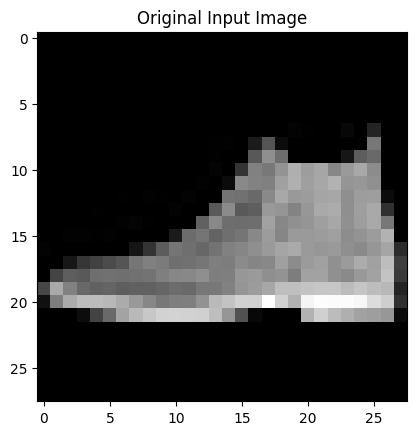

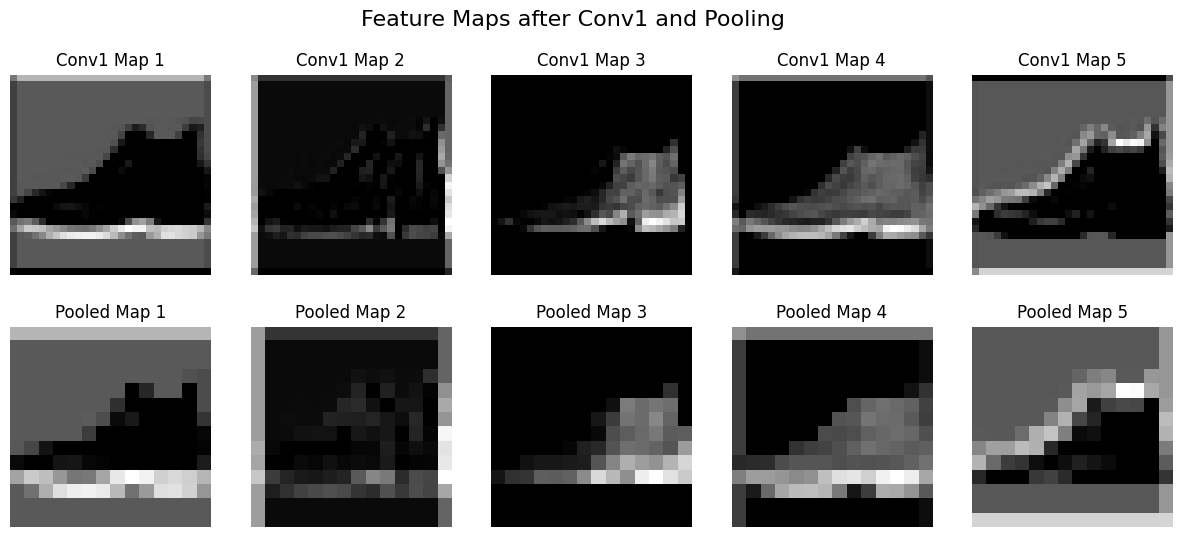

In [7]:
# 📌 Step 7: Test and Visualize
dataiter = iter(test_loader)
images, labels = next(dataiter)

print("True Label:", labels[0].item())
plt.imshow(images[0][0], cmap="gray")
plt.title("Original Input Image")
plt.show()

visualize_feature_maps(model, images)
